In [1]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [2]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure"
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure"
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,Total Staff Costs,Maintenance & Improvement Costs,Energy,Total Costs of Educational Supplies,Catering supplies,Total Income,Total Expenditure
0,schools,100000.0,London,Inner,The Aldgate School,Voluntary aided school,Primary,...,2090079.04,76359.66,35754.14,136024.15,126718.75,2809309.10,2913152.76
1,schools,100008.0,London,Inner,Argyle Primary School,Community school,Primary,...,1929998.33,68178.95,53310.44,121717.26,136146.80,2953867.79,3070743.42
2,schools,100009.0,London,Inner,West Hampstead Primary School,Community school,Primary,...,2114540.23,43503.92,50191.62,127566.76,114627.28,3061364.39,3229929.49
3,schools,100011.0,London,Inner,Brookfield Primary School,Community school,Primary,...,2267889.94,38719.52,41976.24,68734.28,130552.69,2990120.56,3056248.00
4,schools,100014.0,London,Inner,Fleet Primary School,Community school,Primary,...,1343765.83,36556.54,28607.39,79067.92,69799.14,1903556.49,1883571.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10024,schools,112328.0,North West,Neither,Shap Endowed CofE Primary School,Voluntary aided school,Primary,...,462513.78,24516.81,29324.54,66167.34,32976.42,645105.58,667720.26
10025,schools,112356.0,North West,Neither,Leven Valley CofE Primary School,Voluntary aided school,Primary,...,331411.25,26442.59,21209.22,50822.40,18996.26,489616.83,520283.52
10026,schools,112372.0,North West,Neither,Warcop CofE Primary School,Voluntary aided school,Primary,...,434029.91,17369.98,16345.72,62750.31,30641.76,589572.38,599252.02
10027,schools,112415.0,North West,Neither,Ireleth St Peter's CofE Primary School,Voluntary aided school,Primary,...,397391.00,22487.71,19071.87,45900.71,11392.13,525139.21,552828.00


In [3]:
# staff costs. 
# Corellation between high quality teaching and 
# increased funding levels of attainment. 
# disadvantaged cohorts

# Efficiency is in staff. 80% fo funding. 
# Schools are not evidencing this. 
# Staff costs per pupil called out as a source of study. 

# MAT 

# Disadvantaged analysis add some. 

# 

In [4]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,Energy,Total Costs of Educational Supplies,Catering supplies,Total Income,Total Expenditure,Income per Student,Expenditure per Student
0,schools,100000.0,London,Inner,The Aldgate School,Voluntary aided school,Primary,...,35754.14,136024.15,126718.75,2809309.10,2913152.76,10366.454244,10749.641181
1,schools,100008.0,London,Inner,Argyle Primary School,Community school,Primary,...,53310.44,121717.26,136146.80,2953867.79,3070743.42,8439.622257,8773.552629
2,schools,100009.0,London,Inner,West Hampstead Primary School,Community school,Primary,...,50191.62,127566.76,114627.28,3061364.39,3229929.49,7869.831337,8303.160643
3,schools,100011.0,London,Inner,Brookfield Primary School,Community school,Primary,...,41976.24,68734.28,130552.69,2990120.56,3056248.00,7910.371852,8085.312169
4,schools,100014.0,London,Inner,Fleet Primary School,Community school,Primary,...,28607.39,79067.92,69799.14,1903556.49,1883571.80,8348.931974,8261.279825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10024,schools,112328.0,North West,Neither,Shap Endowed CofE Primary School,Voluntary aided school,Primary,...,29324.54,66167.34,32976.42,645105.58,667720.26,7128.238453,7378.124420
10025,schools,112356.0,North West,Neither,Leven Valley CofE Primary School,Voluntary aided school,Primary,...,21209.22,50822.40,18996.26,489616.83,520283.52,7307.713881,7765.425672
10026,schools,112372.0,North West,Neither,Warcop CofE Primary School,Voluntary aided school,Primary,...,16345.72,62750.31,30641.76,589572.38,599252.02,7278.671358,7398.173086
10027,schools,112415.0,North West,Neither,Ireleth St Peter's CofE Primary School,Voluntary aided school,Primary,...,19071.87,45900.71,11392.13,525139.21,552828.00,7501.988714,7897.542857


In [5]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: 1.0122200174949871
Median IE Ratio: 1.009685394869481
Min IE Ratio: 0.23832802609652762
Max IE Ratio: 6.470858165060909
STD IE Ratio: 0.08429448026007684


In [6]:
df['Student Buckets'] = pd.cut(df['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
df["Student Buckets"] = df["Student Buckets"].apply(lambda interval: interval.left + 200)
def create_ratio(col, df):
    df[col + ' Ratio'] = df[col] / df['Total Staff Costs']

In [7]:

df['Student Buckets'].unique()

[400, 600, 200, 800, 1000, 1200, 1400, 1600]
Categories (8, int64): [200 < 400 < 600 < 800 < 1000 < 1200 < 1400 < 1600]

In [8]:
create_ratio('Teaching Staff', df)
create_ratio('Supply Staff Costs', df)
create_ratio('Education support staff', df)
create_ratio('Other Staff Costs', df)
create_ratio('Total Staff Costs', df)
create_ratio('Maintenance & Improvement Costs', df)
create_ratio('Energy', df)
create_ratio('Total Costs of Educational Supplies', df)
create_ratio('Catering supplies', df)

<Axes: ylabel='Frequency'>

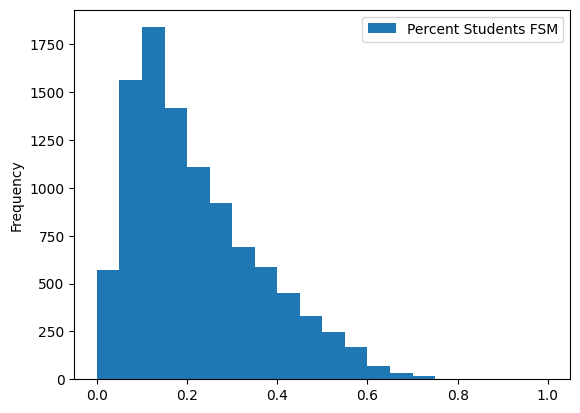

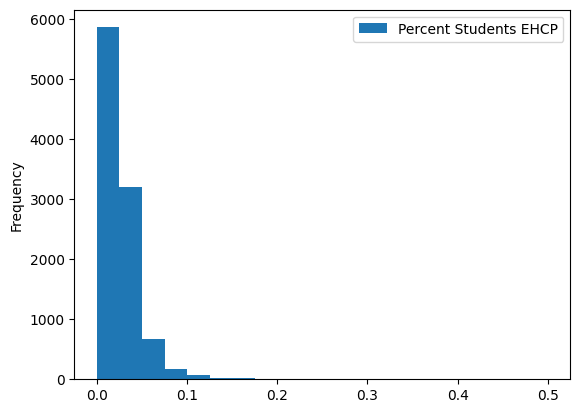

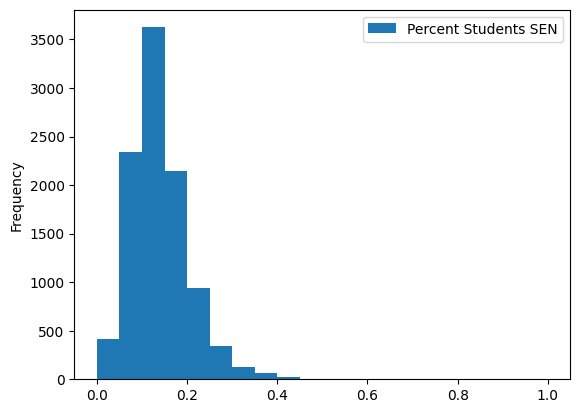

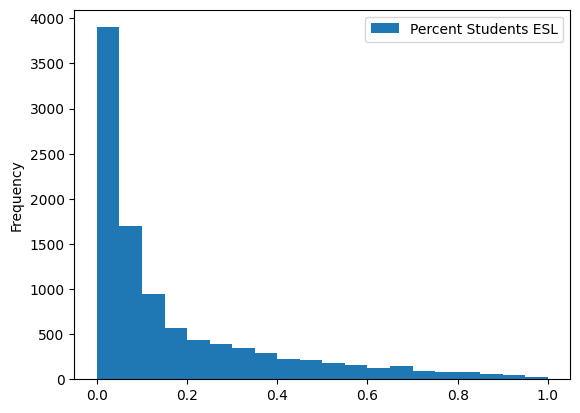

In [9]:
df[['Percent Students FSM']].plot.hist(bins=20)
df[['Percent Students EHCP']].plot.hist(bins=20)
df[['Percent Students SEN']].plot.hist(bins=20)
df[['Percent Students ESL']].plot.hist(bins=20)

<Axes: xlabel='Percent Students ESL', ylabel='Total Staff Costs Ratio'>

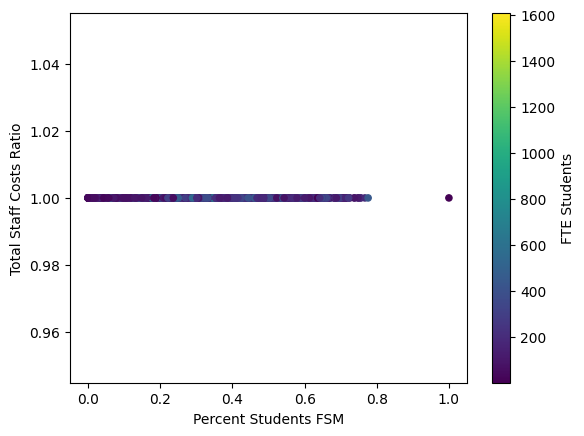

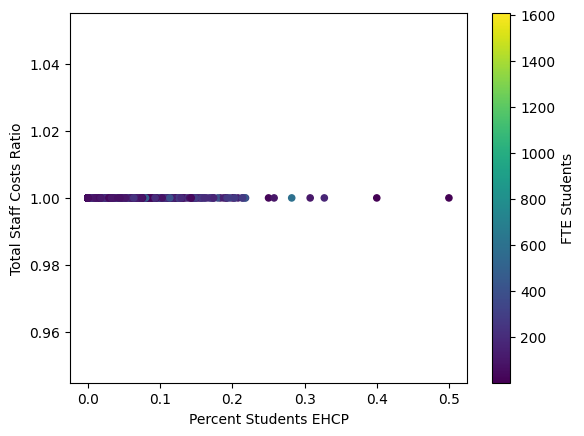

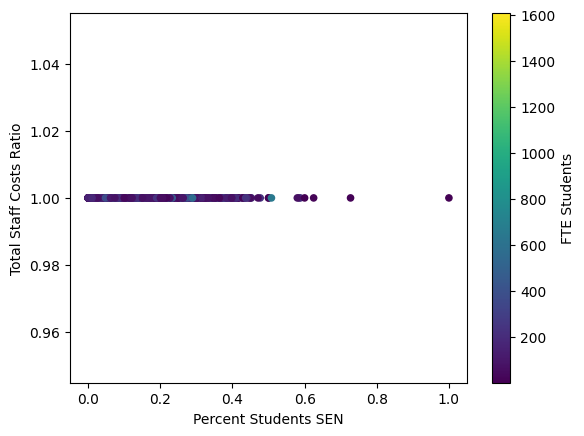

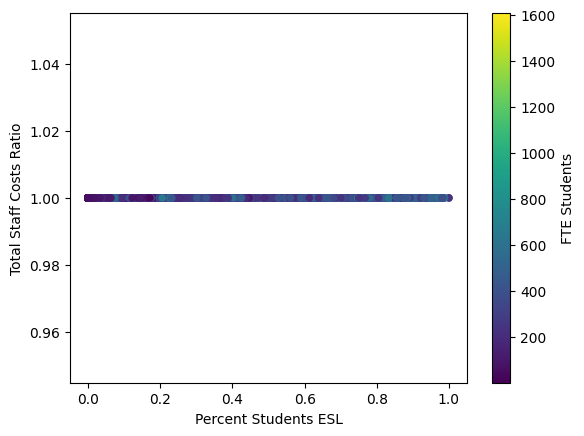

In [10]:
df.plot.scatter(x='Percent Students FSM', y='Total Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students EHCP', y='Total Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students SEN', y='Total Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students ESL', y='Total Staff Costs Ratio', c='FTE Students')

<Axes: xlabel='Percent Students ESL', ylabel='Teaching Staff Ratio'>

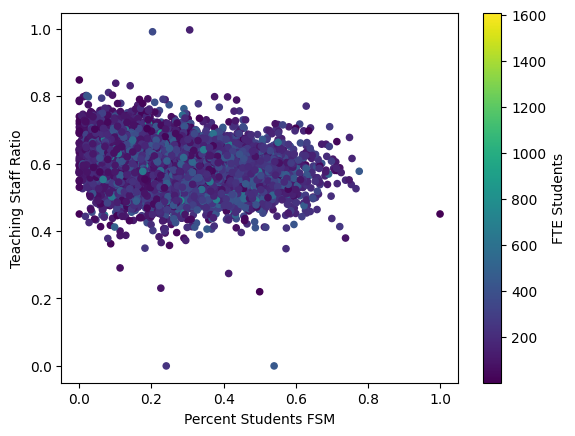

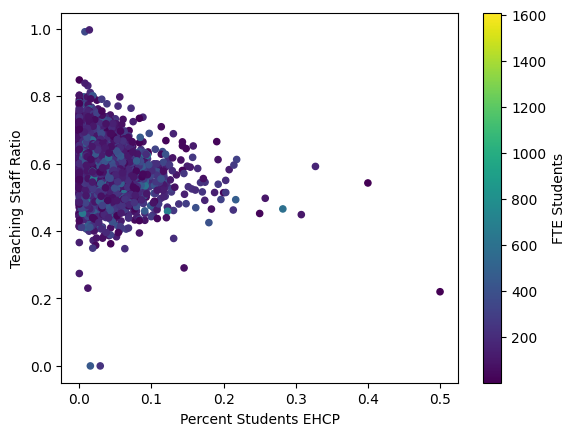

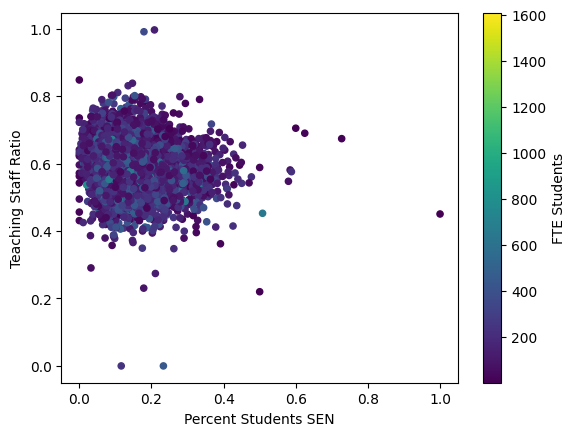

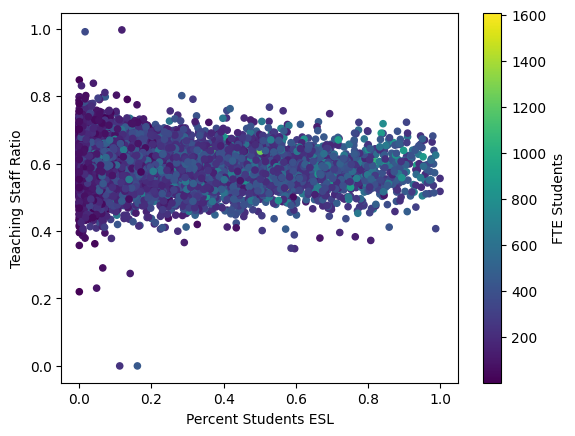

In [11]:
df.plot.scatter(x='Percent Students FSM', y='Teaching Staff Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students EHCP', y='Teaching Staff Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students SEN', y='Teaching Staff Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students ESL', y='Teaching Staff Ratio', c='FTE Students')

<Axes: xlabel='Percent Students ESL', ylabel='Education support staff Ratio'>

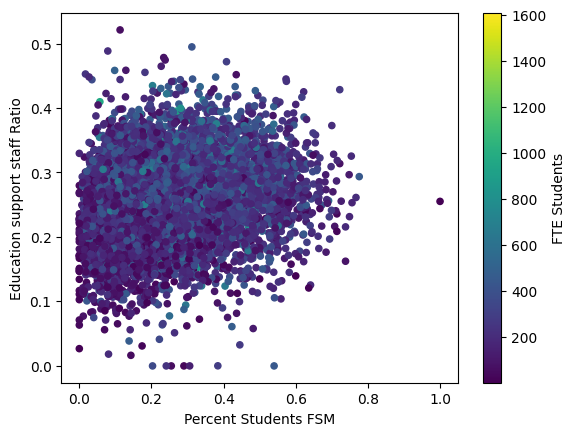

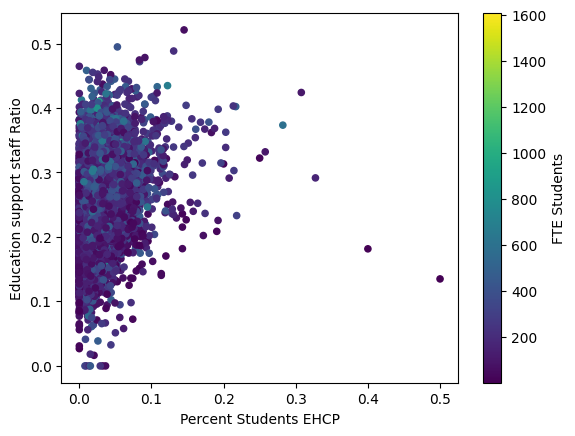

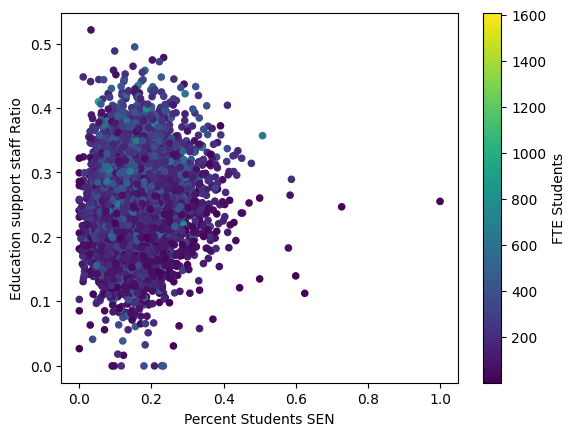

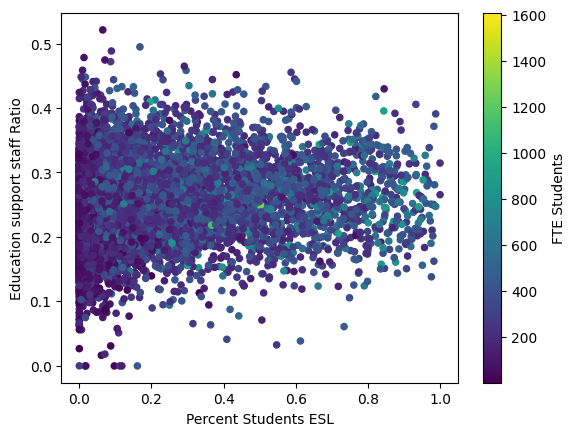

In [12]:
df.plot.scatter(x='Percent Students FSM', y='Education support staff Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students EHCP', y='Education support staff Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students SEN', y='Education support staff Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students ESL', y='Education support staff Ratio', c='FTE Students')

<Axes: xlabel='Percent Students ESL', ylabel='Other Staff Costs Ratio'>

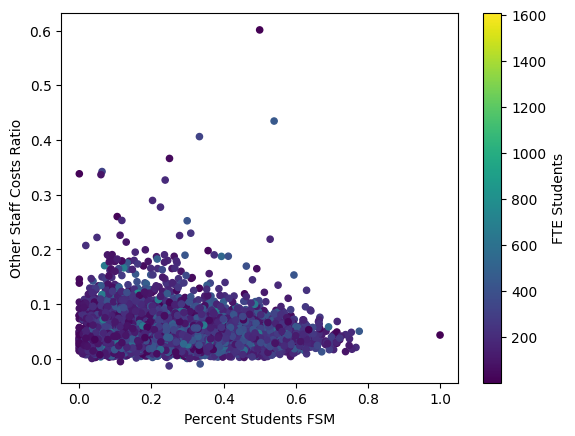

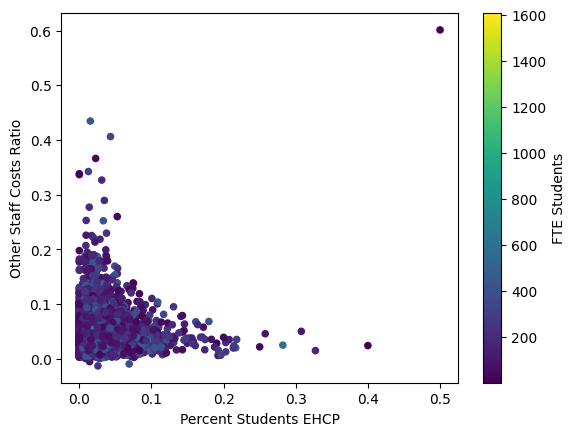

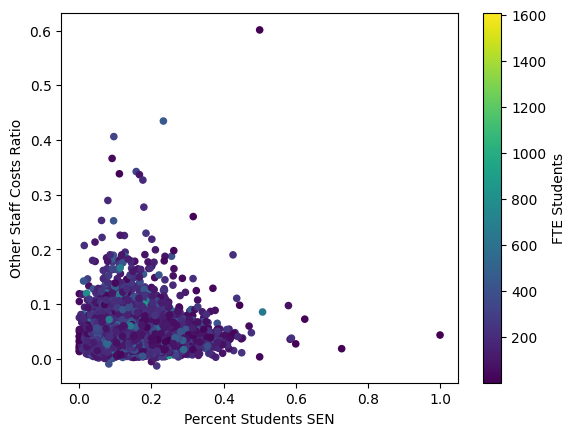

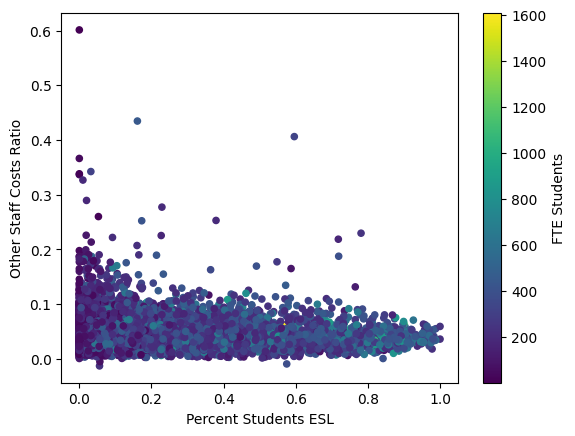

In [13]:
df.plot.scatter(x='Percent Students FSM', y='Other Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students EHCP', y='Other Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students SEN', y='Other Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students ESL', y='Other Staff Costs Ratio', c='FTE Students')

<Axes: xlabel='Percent Students ESL', ylabel='Supply Staff Costs Ratio'>

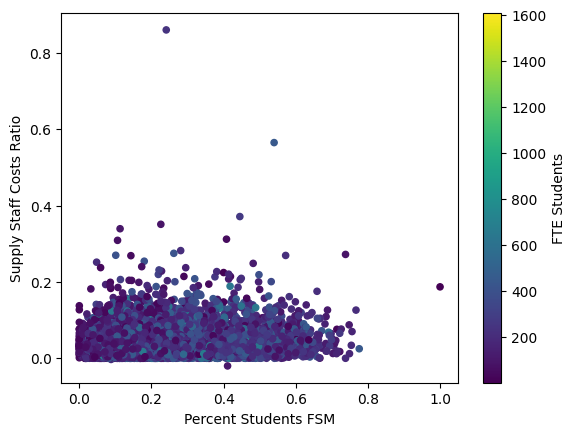

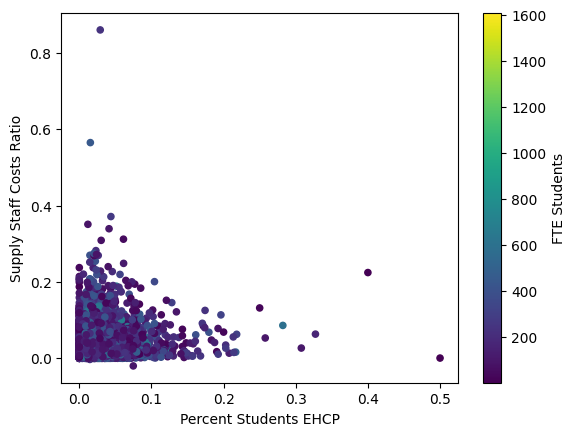

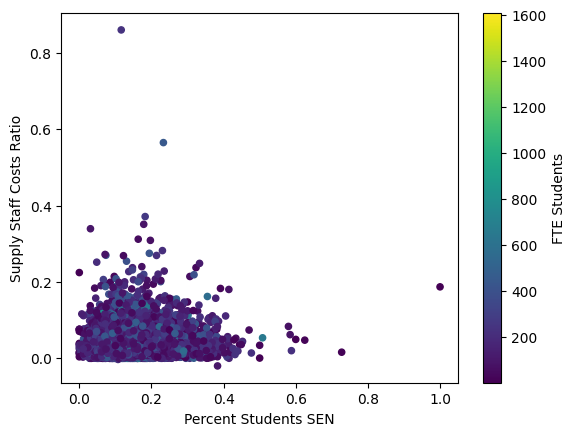

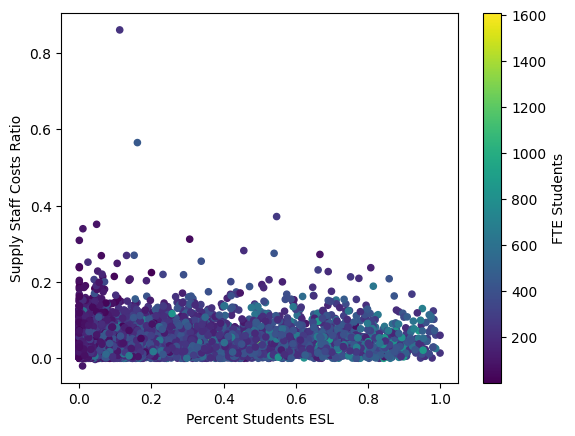

In [14]:
df.plot.scatter(x='Percent Students FSM', y='Supply Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students EHCP', y='Supply Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students SEN', y='Supply Staff Costs Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students ESL', y='Supply Staff Costs Ratio', c='FTE Students')

<Axes: xlabel='Percent Students ESL', ylabel='Total Costs of Educational Supplies Ratio'>

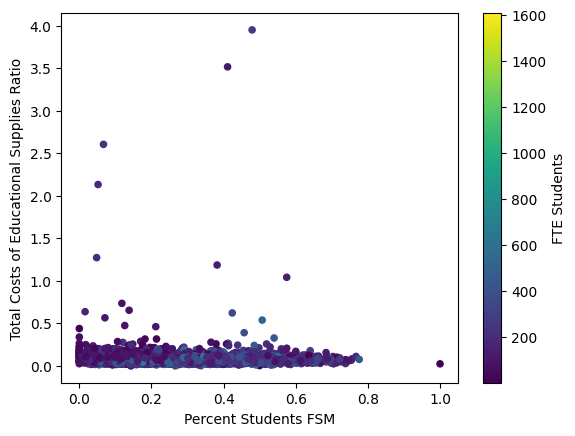

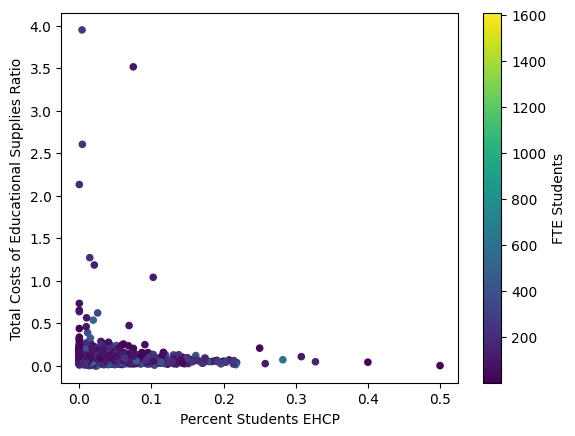

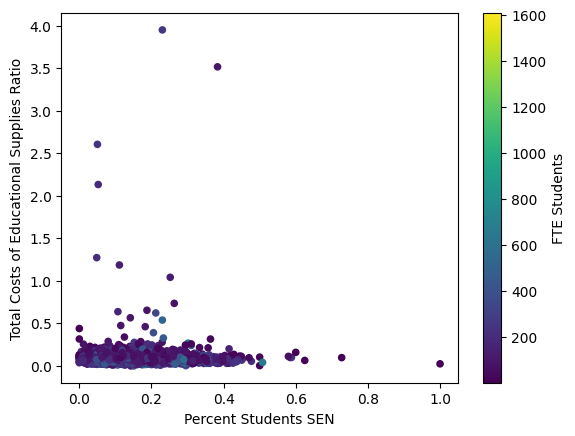

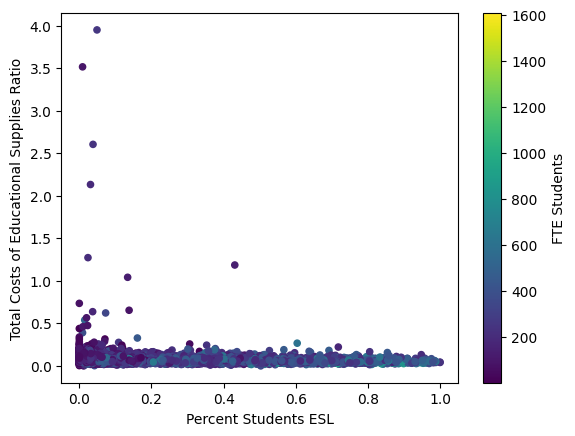

In [15]:
df.plot.scatter(x='Percent Students FSM', y='Total Costs of Educational Supplies Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students EHCP', y='Total Costs of Educational Supplies Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students SEN', y='Total Costs of Educational Supplies Ratio', c='FTE Students')
df.plot.scatter(x='Percent Students ESL', y='Total Costs of Educational Supplies Ratio', c='FTE Students')


<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

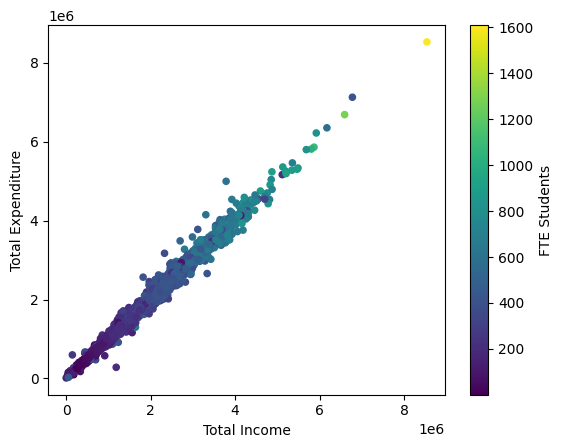

In [16]:
df.loc[(df['Overall Phase'] == 'Primary') & (df['Region'] != 'London')].plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [17]:
df['Classroom Staff'] = df['Teaching Staff'] + df['Supply Staff Costs'] + df['Education support staff']
df['Non Classroom Staff'] = df['Total Staff Costs'] - df['Classroom Staff']
df[['URN', 'School Name', 'Classroom Staff', 'Total Staff Costs', 'Other Staff Costs']]

,URN,School Name,Classroom Staff,Total Staff Costs,Other Staff Costs
0,100000.0,The Aldgate School,1859375.92,2090079.04,36143.09
1,100008.0,Argyle Primary School,1674843.55,1929998.33,141524.70
2,100009.0,West Hampstead Primary School,1859873.92,2114540.23,73536.53
3,100011.0,Brookfield Primary School,1976365.33,2267889.94,148711.36
4,100014.0,Fleet Primary School,1210317.40,1343765.83,36757.31
...,...,...,...,...,...
10024,112328.0,Shap Endowed CofE Primary School,406105.53,462513.78,19740.06
10025,112356.0,Leven Valley CofE Primary School,302989.83,331411.25,13746.23
10026,112372.0,Warcop CofE Primary School,389992.38,434029.91,24066.61
10027,112415.0,Ireleth St Peter's CofE Primary School,364415.04,397391.00,16382.66


<Axes: xlabel='Classroom Staff', ylabel='Non Classroom Staff'>

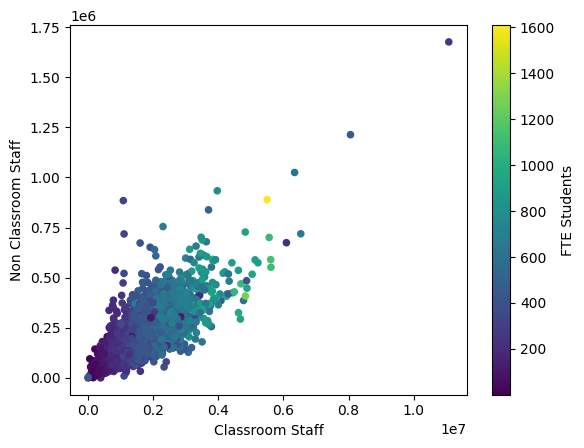

In [18]:
df.plot.scatter(x='Classroom Staff', y='Non Classroom Staff', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

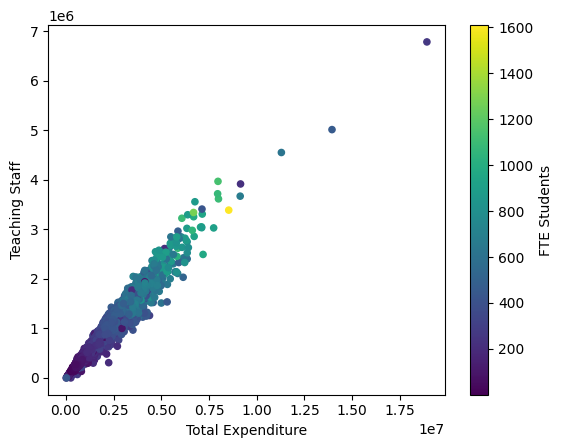

In [19]:
df.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [20]:
def show_stats (col):
    agg_func_math = {
        col + ' Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff Ratio                              
                                mean median   min   max   std  var
Student Buckets                                                   
200                             0.61   0.61  0.22  1.00  0.07  0.0
400                             0.60   0.60  0.35  0.99  0.06  0.0
600                             0.59   0.59  0.41  0.80  0.05  0.0
800                             0.59   0.59  0.45  0.73  0.05  0.0
1000                            0.60   0.60  0.49  0.70  0.06  0.0
1200                            0.60   0.59  0.58  0.64  0.02  0.0
1400                            0.64   0.64  0.64  0.64   NaN  NaN
1600                            0.53   0.53  0.53  0.53   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Supply Staff Costs'>

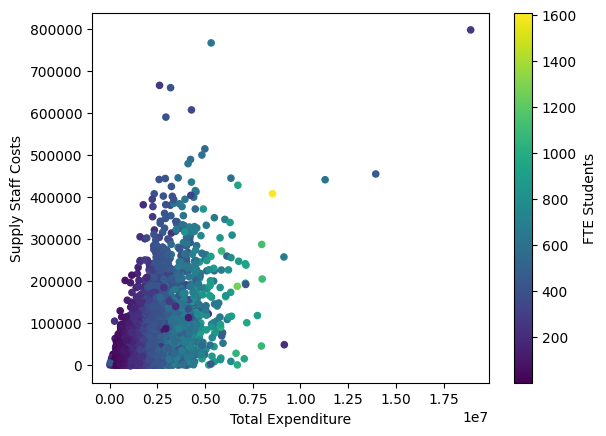

In [21]:
                    
df.plot.scatter(x='Total Expenditure', y='Supply Staff Costs', c='FTE Students')

In [22]:
show_stats('Supply Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Supply Staff Costs Ratio                              
                                    mean median   min   max   std  var
Student Buckets                                                       
200                                 0.04   0.03  0.00  0.35  0.03  0.0
400                                 0.04   0.03  0.00  0.86  0.03  0.0
600                                 0.04   0.03  0.00  0.57  0.03  0.0
800                                 0.04   0.03  0.00  0.19  0.03  0.0
1000                                0.04   0.04  0.00  0.12  0.02  0.0
1200                                0.03   0.03  0.01  0.06  0.02  0.0
1400                                0.04   0.04  0.04  0.04   NaN  NaN
1600                                0.06   0.06  0.06  0.06   NaN  NaN

<Axes: xlabel='Supply Staff Costs Ratio', ylabel='Teaching Staff Ratio'>

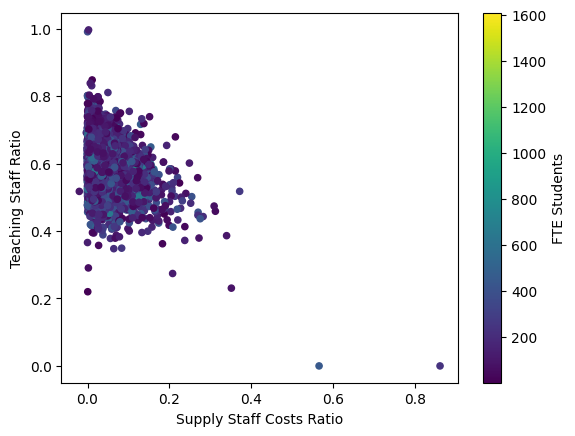

In [23]:
df.plot.scatter(x='Supply Staff Costs Ratio', y='Teaching Staff Ratio', c='FTE Students')

<Axes: xlabel='Supply Staff Costs Ratio', ylabel='FTE Teachers'>

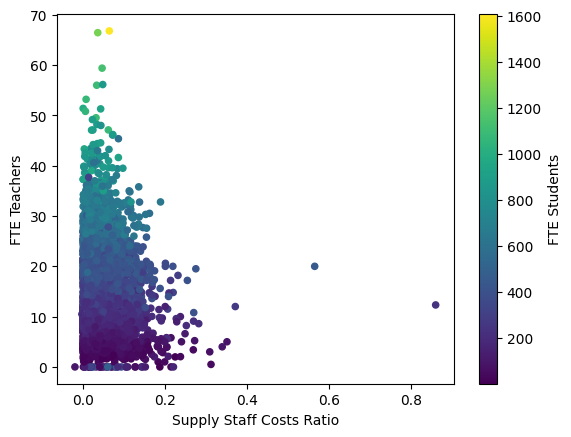

In [24]:
df.plot.scatter(x='Supply Staff Costs Ratio', y='FTE Teachers', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

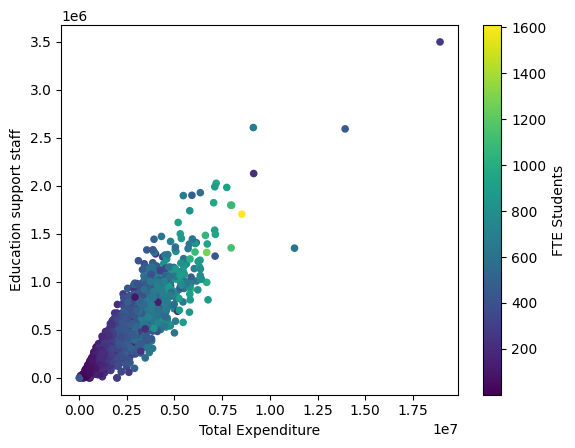

In [25]:

df.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [26]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff Ratio                              
                                         mean median   min   max   std  var
Student Buckets                                                            
200                                      0.23   0.23  0.02  0.52  0.06  0.0
400                                      0.26   0.25  0.00  0.49  0.06  0.0
600                                      0.26   0.26  0.04  0.49  0.06  0.0
800                                      0.26   0.26  0.09  0.43  0.05  0.0
1000                                     0.26   0.25  0.15  0.41  0.06  0.0
1200                                     0.27   0.29  0.21  0.30  0.04  0.0
1400                                     0.25   0.25  0.25  0.25   NaN  NaN
1600                                     0.27   0.27  0.27  0.27   NaN  NaN

<Axes: xlabel='Supply Staff Costs Ratio', ylabel='Education support staff Ratio'>

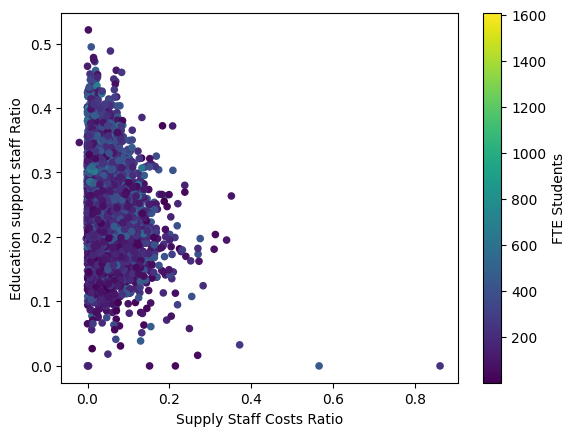

In [27]:
df.plot.scatter(x='Supply Staff Costs Ratio', y='Education support staff Ratio', c='FTE Students')

<Axes: xlabel='Supply Staff Costs Ratio', ylabel='Education support staff Ratio'>

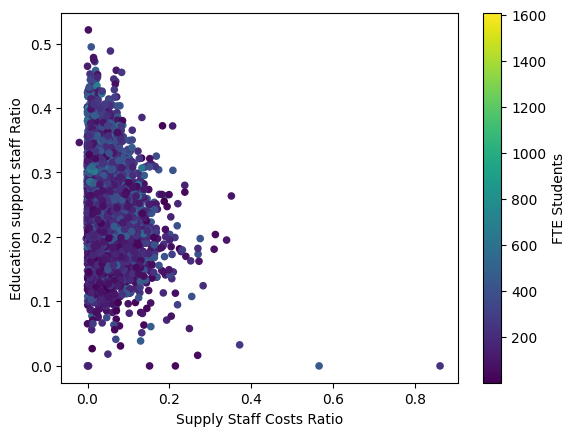

In [28]:
df.plot.scatter(x='Supply Staff Costs Ratio', y='Education support staff Ratio', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

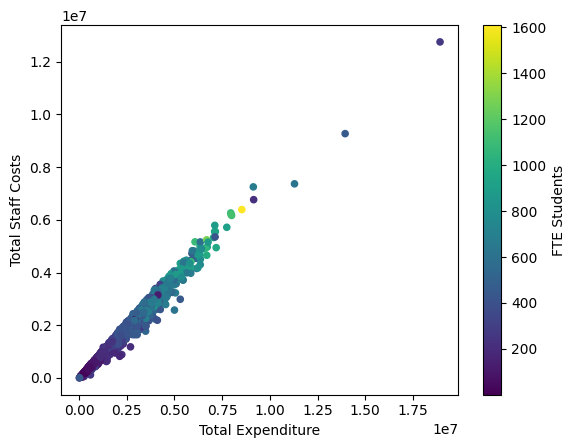

In [29]:

df.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [30]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs Ratio                           
                                   mean median  min  max  std  var
Student Buckets                                                   
200                                 1.0    1.0  1.0  1.0  0.0  0.0
400                                 1.0    1.0  1.0  1.0  0.0  0.0
600                                 1.0    1.0  1.0  1.0  0.0  0.0
800                                 1.0    1.0  1.0  1.0  0.0  0.0
1000                                1.0    1.0  1.0  1.0  0.0  0.0
1200                                1.0    1.0  1.0  1.0  0.0  0.0
1400                                1.0    1.0  1.0  1.0  NaN  NaN
1600                                1.0    1.0  1.0  1.0  NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

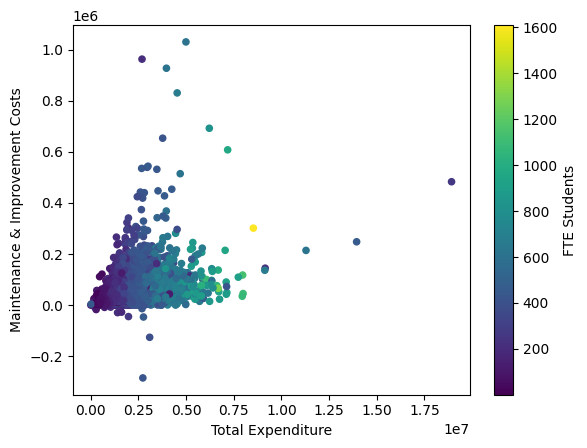

In [31]:

df.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [32]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs Ratio                     \
                                                 mean median   min   max   
Student Buckets                                                            
200                                               inf   0.02  0.00   inf   
400                                              0.03   0.02  0.00  0.82   
600                                              0.03   0.02  0.00  0.49   
800                                              0.03   0.02  0.00  0.41   
1000                                             0.03   0.02  0.00  0.17   
1200                                             0.02   0.02  0.01  0.03   
1400                                             0.01   0.01  0.01  0.01   
1600                                             0.05   0.05  0.05  0.05   

                            
                  std  var  
Student Buckets             
200               NaN  NaN  
400              0.03  0.0  
600              0.03  0.0  
800              0.04  0.0  
1000             0.03  0.0  
1200             0.01  0.0  
1400              NaN  NaN  
1600              NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

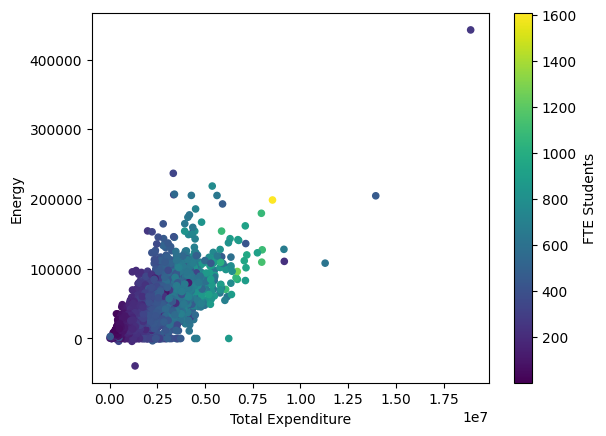

In [33]:

df.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [34]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy Ratio                              
                        mean median   min   max   std  var
Student Buckets                                           
200                      inf   0.03  0.00   inf   NaN  NaN
400                     0.03   0.03  0.00  0.10  0.01  0.0
600                     0.02   0.02  0.00  0.37  0.01  0.0
800                     0.02   0.02  0.00  0.07  0.01  0.0
1000                    0.02   0.02  0.01  0.06  0.01  0.0
1200                    0.02   0.02  0.01  0.03  0.01  0.0
1400                    0.02   0.02  0.02  0.02   NaN  NaN
1600                    0.03   0.03  0.03  0.03   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

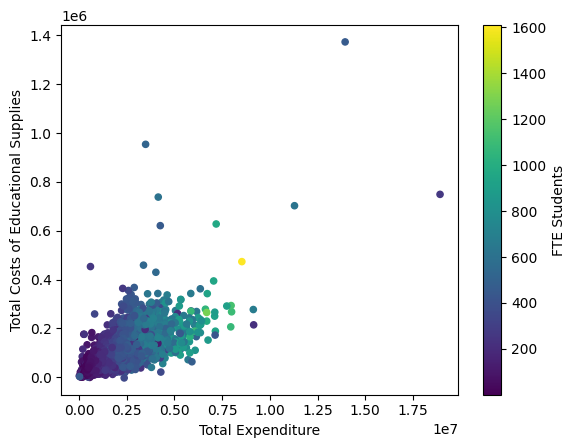

In [35]:

df.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [36]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
200                                                   inf   0.07  0.00   inf   
400                                                  0.07   0.07  0.00  3.95   
600                                                  0.07   0.06  0.01  0.54   
800                                                  0.06   0.06  0.01  0.27   
1000                                                 0.05   0.05  0.02  0.13   
1200                                                 0.05   0.04  0.03  0.06   
1400                                                 0.05   0.05  0.05  0.05   
1600                                                 0.07   0.07  0.07  0.07   

                             
                  std   var  
Student Buckets              
200               NaN   NaN  
400              0.08  0.01  
600              0.03  0.00  
800              0.02  0.00  
1000             0.02  0.00  
1200             0.01  0.00  
1400              NaN   NaN  
1600              NaN   NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

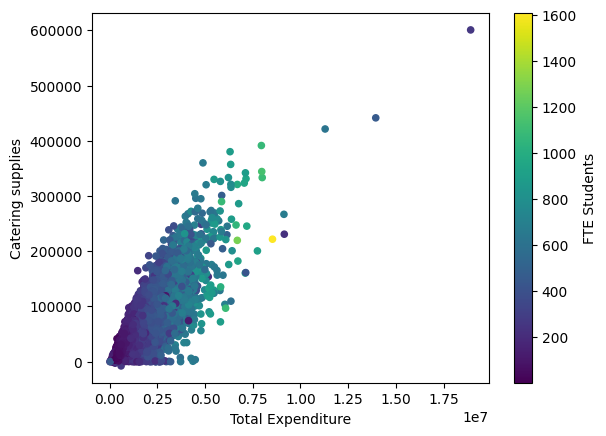

In [37]:

df.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [38]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_56587/3091004637.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies Ratio                              
                                   mean median   min   max   std  var
Student Buckets                                                      
200                                0.06   0.05  0.00  0.16  0.02  0.0
400                                0.06   0.05  0.00  0.18  0.02  0.0
600                                0.05   0.05  0.00  0.11  0.02  0.0
800                                0.05   0.05  0.00  0.12  0.02  0.0
1000                               0.05   0.05  0.02  0.09  0.02  0.0
1200                               0.05   0.05  0.02  0.07  0.02  0.0
1400                               0.04   0.04  0.04  0.04   NaN  NaN
1600                               0.03   0.03  0.03  0.03   NaN  NaN

In [39]:
test

NameError: name 'test' is not defined